In [1]:

import pandas as pd
import seaborn as sns 
from pandas import DataFrame
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
from sklearn.preprocessing import LabelEncoder
import numpy as np
import plotly
import statistics
import plotly.express as px
import stats
import matplotlib.pyplot as plt 
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score
import plotly.express as px
import datetime
import datetime as dt
import time


# Supress Scientific notation in python
pd.set_option('display.float_format', lambda x: '%.2f' % x)

# Display all columns of long dataframe
pd.set_option('display.max_columns', None)


# open cohort

s=pd.read_csv('salesc.csv')
print(s.columns)
scohort=DataFrame(s.head(152))
print(scohort.head(152))

#parse index
scohort['year']=pd.to_datetime(scohort['year'], infer_datetime_format=True)
indexeddf=scohort.set_index(['year'])
print(indexeddf)

#parsing to time format and extracting dates with 'created_at'
x=scohort['year']=pd.to_datetime(scohort['year'], format='%d-%m-%y')

Day=scohort['year'].dt.day_name()
Month=scohort['year'].dt.month_name()
Year=scohort['year'].dt.year

#subsetting 
scohort['Year']=scohort['year'].dt.year
scohort['Month']=scohort['year'].dt.month_name()
scohort['Day']=scohort['year'].dt.day_name()

print(scohort)

Index(['year', 'Country', 'Country_code', 'Client_Count', 'Services',
       'Client_id', 'Out_px', 'Actual', 'Target_Rev', 'Compare'],
      dtype='object')
          year     Country  Country_code  Client_Count             Services  \
0     6/6/2018       Chile           130            10  Full_stack_Analysis   
1     6/6/2018       Chile           130             3      Python_Analysis   
2     6/6/2018       Chile           130            10    PowerBI_Analysis    
3     6/6/2018       Chile           130             2    PowerBI_Analysis    
4     6/6/2018       Chile           130             4    PowerBI_Analysis    
..         ...         ...           ...           ...                  ...   
144   6/6/2020  Luxembourg           188           100       RenewableEn_BI   
145   6/7/2020  Luxembourg           188           100       RenewableEn_BI   
146   6/8/2020  Luxembourg           188            50       RenewableEn_BI   
147   6/9/2020  Luxembourg           188            

In [2]:

# I ###########parse dates

def get_month(x):
    return dt.datetime(x.year,x.month,1)

## Create ClientMonth column
scohort['ClientMonth'] = scohort['year'].apply(get_month)

# Group by client_id and select the ClientMonth value
grouping = scohort.groupby('Client_id')['ClientMonth']

## Assign a minimum ClientMonth value to the dataset
scohort['CohortMonth'] = grouping.transform('min')


# calculate time offsets

def get_date_int(df, column):
    year = df[column].dt.year
    month = df[column].dt.month
    return year, month

# Get the integers for date parts from the `ClientMonth` column
client_year, client_month = get_date_int(scohort,'ClientMonth')

# Get the integers for date parts from the `CohortMonth` column
cohort_year, cohort_month = get_date_int(scohort,'CohortMonth')


# Calculate difference in years
years_diff = client_year - cohort_year

# Calculate difference in months
months_diff = client_month - cohort_month

# Extract the difference in months from all previous values
scohort['CohortIndex'] = years_diff * 12 + months_diff + 1
print(scohort)

          year     Country  Country_code  Client_Count             Services  \
0   2018-06-06       Chile           130            10  Full_stack_Analysis   
1   2018-06-06       Chile           130             3      Python_Analysis   
2   2018-06-06       Chile           130            10    PowerBI_Analysis    
3   2018-06-06       Chile           130             2    PowerBI_Analysis    
4   2018-06-06       Chile           130             4    PowerBI_Analysis    
..         ...         ...           ...           ...                  ...   
144 2020-06-06  Luxembourg           188           100       RenewableEn_BI   
145 2020-06-07  Luxembourg           188           100       RenewableEn_BI   
146 2020-06-08  Luxembourg           188            50       RenewableEn_BI   
147 2020-06-09  Luxembourg           188            50       RenewableEn_BI   
148 2020-06-10  Luxembourg           188            50       RenewableEn_BI   

     Client_id  Out_px  Actual  Target_Rev  Compare

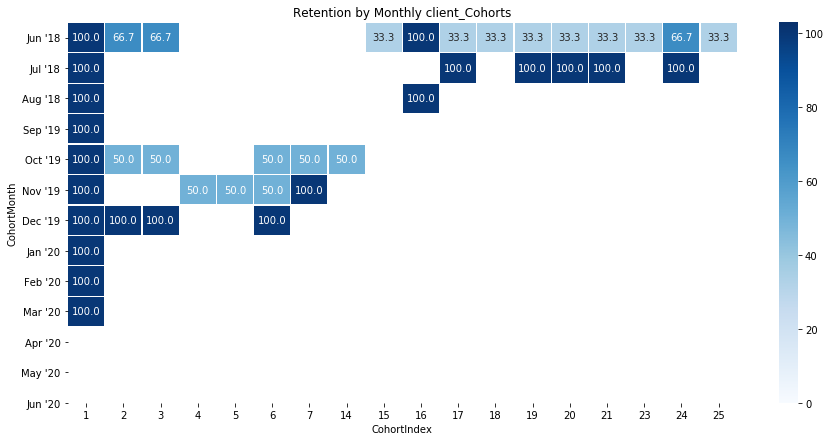

In [3]:

#Retention rate
#% of active clients to the total no of clients

#steps:

#1
grouping = scohort.groupby(['CohortMonth', 'CohortIndex'])


#2 count unque vals per clientid

cohort_data = grouping['Client_id'].apply(pd.Series.nunique).reset_index()

#step3 create pivot

cohort_counts = cohort_data.pivot(index='CohortMonth', columns='CohortIndex', values='Client_id')

#step4 Select the first column and store it to cohort_sizes

cohort_sizes = cohort_counts.iloc[:,0]

# step 5 Divide the cohort count by cohort sizes along the rows

retention = cohort_counts.divide(cohort_sizes, axis=0)*100

# V last chunk of the cohort analysis

months=["Jun '18", "Jul '18", "Aug '18", \
        "Sep '19", "Oct '19","Nov '19",\
            "Dec '19", "Jan '20", "Feb '20", "Mar '20", "Apr '20",\
                "May '20", "Jun '20"]

# setup inches plot figure
plt.figure(figsize=(15,7))

# title- clients cohots
plt.title('Retention by Monthly client_Cohorts')

# Create the heatmap
sns.heatmap(data=retention,
            annot = True,
            cmap = "Blues",
            vmin = '0.0',
            #volmax = 0.5,
            vmax = list(retention.max().sort_values(ascending = False))[1]+3,
            fmt = '.1f',
            linewidth = 0.3,
            yticklabels=months)

plt.show()

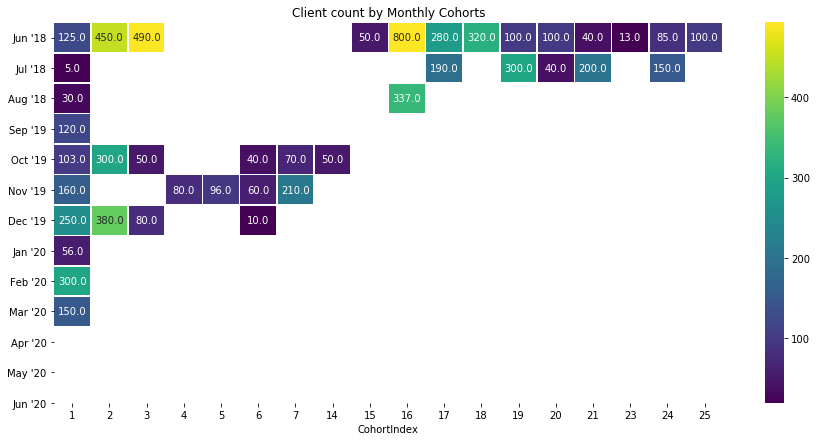

In [4]:
# Calculate the average of the unit price column
plt.figure(figsize=(15,7))

cohort_datas = grouping['Client_Count'].sum()

# Reset the index of cohort_data
cohort_datas = cohort_datas.reset_index()

# Create a pivot 
client_count = cohort_datas.pivot(index='CohortMonth', columns='CohortIndex', values='Client_Count')
client_count.round(2)
client_count.index = client_count.index.date


month_list=["Jun '18", "Jul '18", "Aug '18", \
        "Sep '19", "Oct '19","Nov '19",\
            "Dec '19", "Jan '20", "Feb '20", "Mar '20", "Apr '20",\
                "May '20", "Jun '20"]

# Add a title
plt.title('Client count by Monthly Cohorts')

# Create the heatmap
sns.heatmap(data = client_count,
            annot=True,
            vmin = 20,
#             vmax =20,
            cmap='viridis',
            vmax = list(client_count.max().sort_values(ascending = False))[1]+3,
            fmt = '.1f',
            linewidth = 0.7,
            yticklabels=month_list)
plt.show()




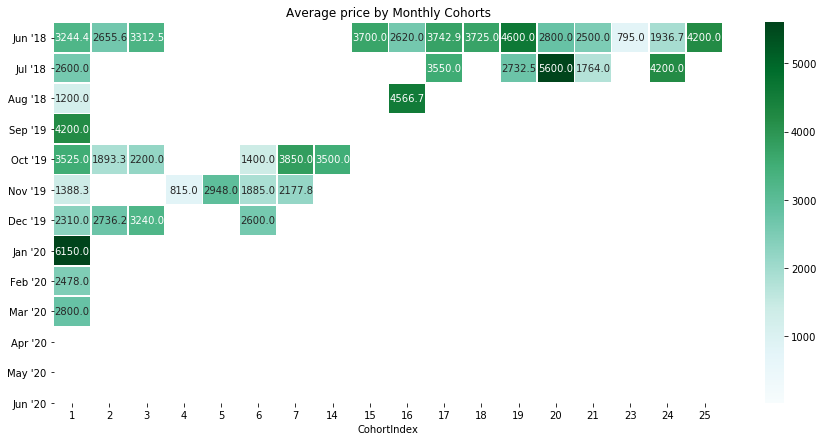

In [5]:


#avg px/cohort 

plt.figure(figsize=(15,7))

# Calculate the average of the unit price column
cohort_datas = grouping['Out_px'].mean()

# Reset the index of cohort_data
cohort_datas = cohort_datas.reset_index()

# Create a pivot 
average_price = cohort_datas.pivot(index='CohortMonth', columns='CohortIndex', values='Out_px')
average_price.round(2)
average_price.index = average_price.index.date


month_list=["Jun '18", "Jul '18", "Aug '18", \
        "Sep '19", "Oct '19","Nov '19",\
            "Dec '19", "Jan '20", "Feb '20", "Mar '20", "Apr '20",\
                "May '20", "Jun '20"]

# Add a title
plt.title('Average price by Monthly Cohorts')

# Create the heatmap
sns.heatmap(data = average_price,
            annot=True,
            vmin = 20,
#             vmax =20,
            cmap='BuGn',
            vmax = list(average_price.max().sort_values(ascending = False))[1]+3,
            fmt = '.1f',
            linewidth = 0.7,
            yticklabels=month_list)
plt.show()

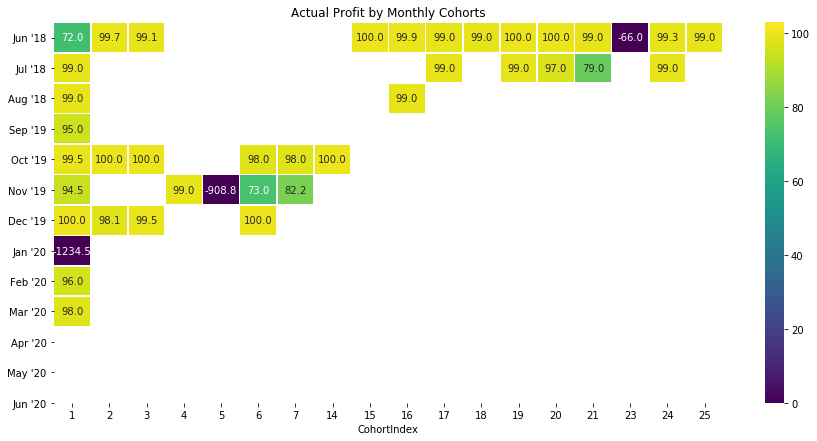

In [15]:
################################
#cohort actual vs target rev in %

plt.figure(figsize=(15,7))

# Create a groupby object and pass the monthly cohort and cohort index as a list
groupings = scohort.groupby(['CohortMonth', 'CohortIndex']) 


# Reset the index of cohort_data
cohort_datas = cohort_datas.reset_index()


# Calculate the average of the unit price column
cohort_datase = grouping['Compare'].mean()

# Reset the index of cohort_data
cohort_datase = cohort_datase.reset_index()

# Create a pivot 
compare = cohort_datase.pivot(index='CohortMonth', columns='CohortIndex', values='Compare')
compare.round(2)
compare.index = compare.index.date


month_list=["Jun '18", "Jul '18", "Aug '18", \
        "Sep '19", "Oct '19","Nov '19",\
            "Dec '19", "Jan '20", "Feb '20", "Mar '20", "Apr '20",\
                "May '20", "Jun '20"]

# Add a title
plt.title('Actual Profit by Monthly Cohorts')

# Create the heatmap
sns.heatmap(data = compare,
            annot=True,
            vmin = '0.0',
#             vmax =20,
            cmap='viridis',
            vmax = list(compare.max().sort_values(ascending = False))[1]+3,
            fmt = '.1f',
            linewidth = 0.7,
            yticklabels=month_list)
plt.show()

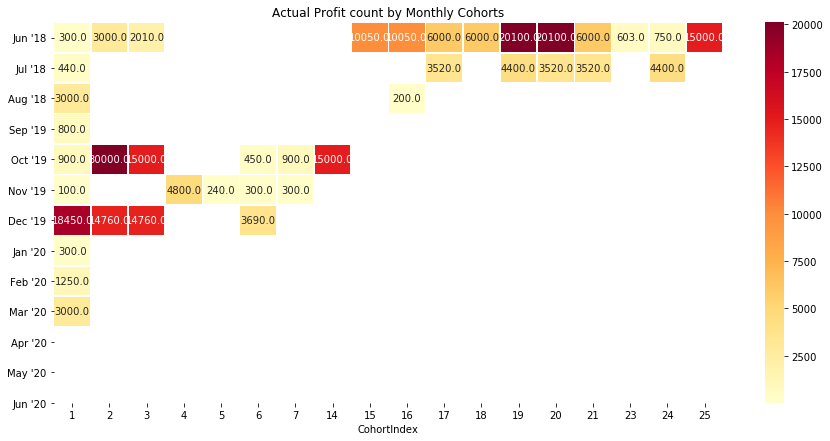

In [9]:
########################################
# Calculate the average of the unit price column
cohort_datas = grouping['Actual'].min()

# Reset the index of cohort_data
cohort_datas = cohort_datas.reset_index()

# Create a pivot 
actual_p = cohort_datas.pivot(index='CohortMonth', columns='CohortIndex', values='Actual')
actual_p.round(5)
actual_p.index = actual_p.index.date
plt.figure(figsize=(15,7))

month_list=["Jun '18", "Jul '18", "Aug '18", \
        "Sep '19", "Oct '19","Nov '19",\
            "Dec '19", "Jan '20", "Feb '20", "Mar '20", "Apr '20",\
                "May '20", "Jun '20"]

# Add a title
plt.title('Actual Profit count by Monthly Cohorts')

# Create the heatmap
sns.heatmap(data = actual_p,
            annot=True,
            vmin = 20,
#             vmax =20,
            cmap='YlOrRd',
            vmax = list(actual_p.max().sort_values(ascending = False))[1]+3,
            fmt = '.1f',
            linewidth = 0.7,
            yticklabels=month_list)
plt.show()



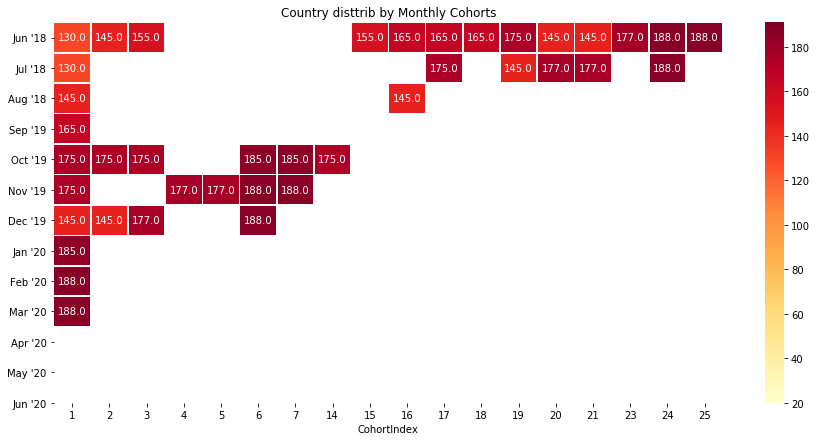

In [17]:
# Calculate the average of the unit price column
cohort_datas = grouping['Country_code'].max()

# Reset the index of cohort_data
cohort_datas = cohort_datas.reset_index()

# Create a pivot 
Country_code = cohort_datas.pivot(index='CohortMonth', columns='CohortIndex', values='Country_code')
Country_code.round(5)
Country_code.index = Country_code.index.date
plt.figure(figsize=(15,7))

month_list=["Jun '18", "Jul '18", "Aug '18", \
        "Sep '19", "Oct '19","Nov '19",\
            "Dec '19", "Jan '20", "Feb '20", "Mar '20", "Apr '20",\
                "May '20", "Jun '20"]

# Add a title
plt.title('Country disttrib by Monthly Cohorts')

# Create the heatmap
sns.heatmap(data = Country_code,
            annot=True,
            vmin = 20,
#             vmax =20,
            cmap='YlOrRd',
            vmax = list(Country_code.max().sort_values(ascending = False))[1]+3,
            fmt = '.1f',
            linewidth = 0.7,
            yticklabels=month_list)
plt.show()